In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
four_cols = pd.read_csv('four_cols.csv')
four_cols.columns

Index(['income', 'age', 'days_since_purchase', 'annual_spend'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

columns_z = []
for colum in list(four_cols.columns):
    scaler = StandardScaler().fit(four_cols[[colum]])
    four_cols[colum + '_Z'] = scaler.transform(four_cols[[colum]])
    columns_z.append(colum + '_Z')

four_cols.head()

,income,age,days_since_purchase,annual_spend,income_Z,age_Z,days_since_purchase_Z,annual_spend_Z
0,37453,48,504,4441,-0.890426,0.604861,0.753257,0.062276
1,50775,50,566,4239,-0.553094,0.789354,1.306361,-0.058939
2,71047,41,326,5834,-0.039778,-0.040865,-0.834688,0.898182
3,52239,52,259,5456,-0.516023,0.973847,-1.432398,0.671353
4,112343,27,279,1749,1.005897,-1.332317,-1.253977,-1.553129


In [ ]:
columns_z

['income_Z', 'age_Z', 'days_since_purchase_Z', 'annual_spend_Z']

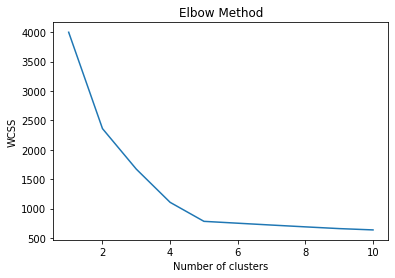

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(four_cols[columns_z].values)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans( n_clusters = 5,
                random_state = 10)
model.fit(four_cols[columns_z])
four_cols['Cluster'] = model.labels_
four_cols.head()

,income,age,days_since_purchase,annual_spend,income_Z,age_Z,days_since_purchase_Z,annual_spend_Z,Cluster
0,37453,48,504,4441,-0.890426,0.604861,0.753257,0.062276,0
1,50775,50,566,4239,-0.553094,0.789354,1.306361,-0.058939,0
2,71047,41,326,5834,-0.039778,-0.040865,-0.834688,0.898182,4
3,52239,52,259,5456,-0.516023,0.973847,-1.432398,0.671353,4
4,112343,27,279,1749,1.005897,-1.332317,-1.253977,-1.553129,3


<Figure size 1440x1440 with 0 Axes>

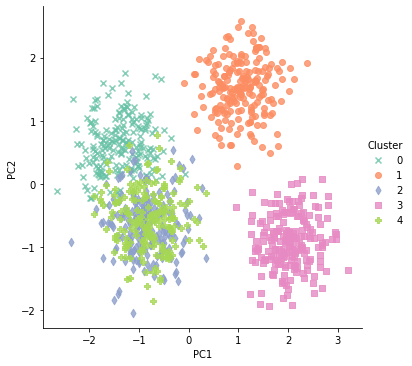

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
four_cols['PC1'], four_cols['PC2'] = zip(* pca.fit_transform(four_cols[columns_z]))

plt.figure(figsize = (20,20))
sns.lmplot( x = 'PC1',
            y = 'PC2',
            data = four_cols,
            hue = 'Cluster',
            markers = ['x','o','d','s','P'],
            fit_reg = False,
             palette="Set2")

In [ ]:
four_cols.columns

Index(['income', 'age', 'days_since_purchase', 'annual_spend', 'income_Z',
       'age_Z', 'days_since_purchase_Z', 'annual_spend_Z', 'Cluster', 'PC1',
       'PC2'],
      dtype='object')

In [ ]:
four_cols.groupby(['Cluster'])[['income', 'age', 'days_since_purchase', 'annual_spend']].mean().reset_index()


,Cluster,income,age,days_since_purchase,annual_spend
0,0,43101.812183,50.050761,505.218274,5568.370558
1,1,42643.611940,30.039801,500.567164,2501.761194
2,2,115626.490196,48.906863,498.500000,5540.818627
3,3,116310.542714,29.291457,294.125628,2501.728643
4,4,44331.050251,48.939698,297.472362,5574.000000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff5e2091-543c-4b2c-9a56-1e41bbaff775' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>